<a href="https://colab.research.google.com/github/momo76620/Machine-learning/blob/main/Mohammed_Drici_TP01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [10]:
wine = pd.read_csv("/content/sample_data/winequality-red.csv", sep=';')
print(wine.head(3))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  


In [12]:
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


We have 11 float features (float64) and 1 integer feature (int64). You can display now the histogramm of each
feature using pyplot class. The function hist() allows you to evaluate the histogramm of any numerical vector:

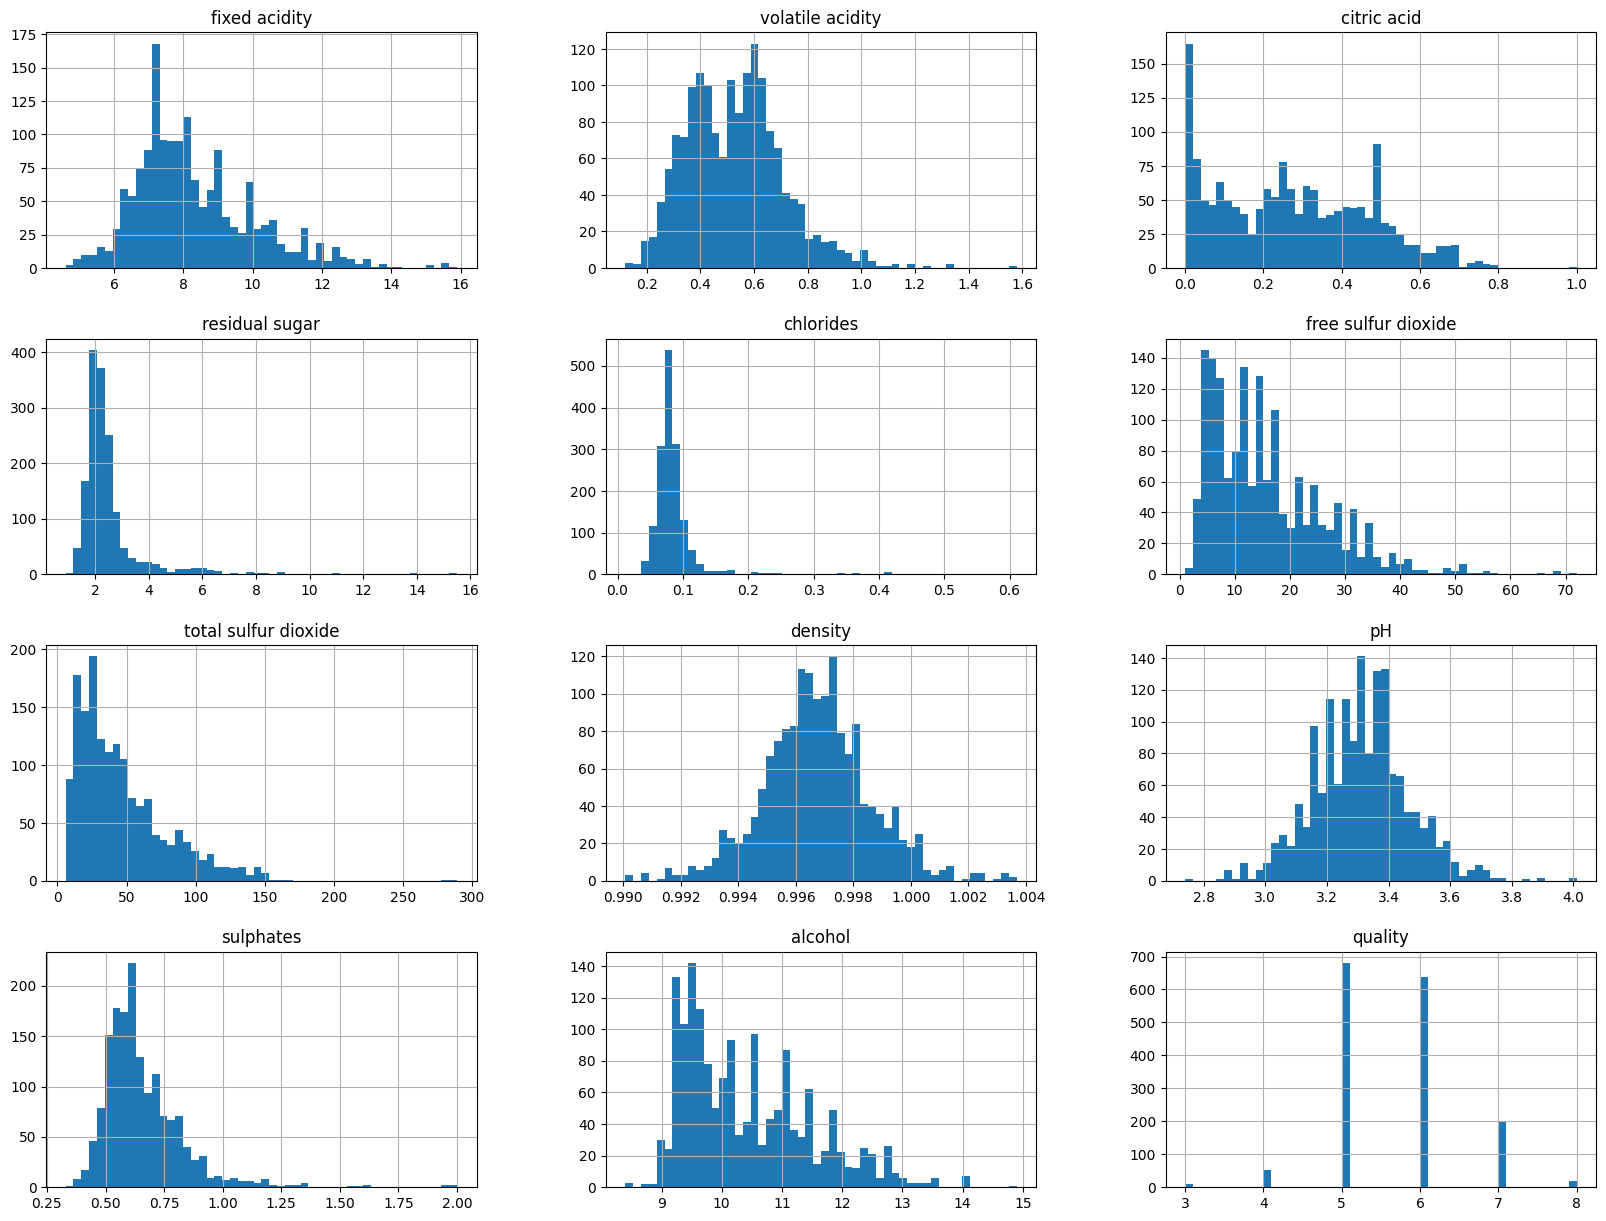

In [19]:
import matplotlib.pyplot as plt
wine.hist(bins=50,figsize=(20,15))
plt.show()

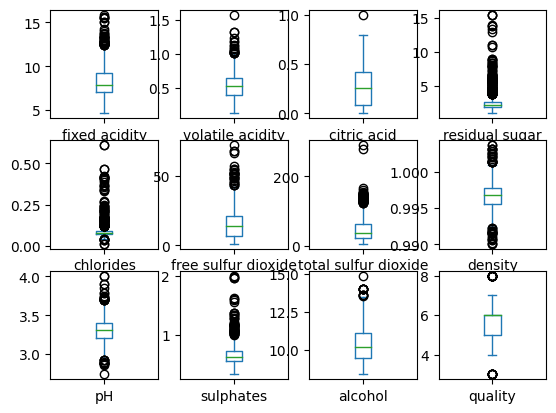

In [21]:
wine.plot(kind='box', subplots=True, layout=(3,4), sharex=False, sharey=False)
plt.show()

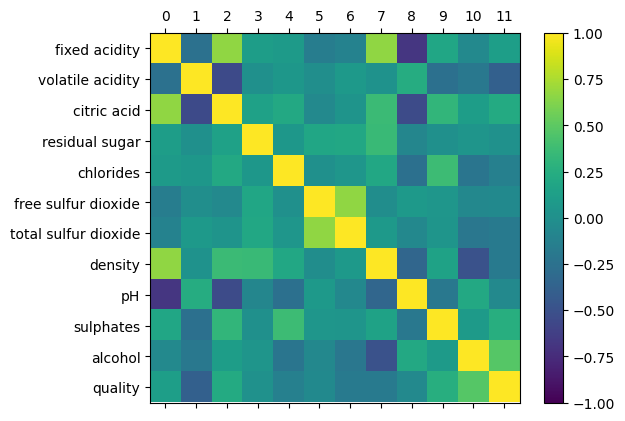

In [22]:
import numpy
correlations = wine.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,12,1)
names= wine.head(0)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
#ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

La corrélation donne une indication du degré de relation entre les changements entre deux variables. Si deux variables changent
dans la même direction, ils sont positivement corrélés. Si le changement dans des directions opposées ensemble (l'un monte, l'autre
diminue), alors ils sont corrélés négativement.
Vous pouvez calculer la corrélation entre chaque paire d'attributs. C'est ce qu'on appelle une matrice de corrélation. Tu peux
puis tracez la matrice de corrélation et obtenez une idée des variables qui ont une forte corrélation les unes avec les autres.
Ceci est utile à savoir, car certains algorithmes d'apprentissage automatique comme la régression linéaire et logistique peuvent avoir
de mauvaises performances s'il y a des variables d'entrée hautement corrélées dans vos données.


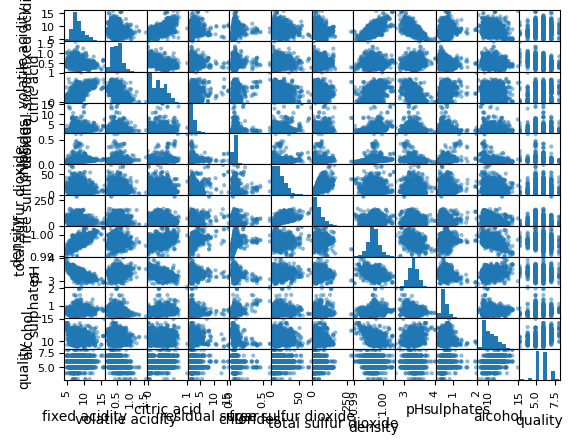

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(wine)
plt.show()

Un nuage de points montre la relation entre deux variables sous forme de points en deux dimensions, un axe pour chaque attribut.
Vous pouvez créer un nuage de points pour chaque paire d'attributs de vos données. Dessiner tous ces nuages ​​​​de points ensemble s'appelle
une matrice de nuages ​​de points.
Les nuages ​​de points sont utiles pour repérer les relations structurées entre les variables, par exemple pour savoir si vous pouvez résumer la relation entre deux variables avec une ligne. Les attributs avec des relations structurées peuvent également être
candidats corrélés et bons à supprimer de votre ensemble de données

In [26]:
#import classes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

#create the pipeline
ML_pipeline = make_pipeline(StandardScaler(),
PCA(n_components=2),
RandomForestClassifier(criterion='entropy', n_estimators=10,
max_depth=4, random_state=1))